# Problem statement

## Context 
Banks offer credits, which can be considered as short- and long-term investments with their own risks. Sometimes client can delay payments or even stop paying at all. Latter situation is called 'default' can result in monetary losses for the bank. To avoid clients that might default banks hire credit officers that evaluate each client, based on the available data. Some banks prefer using credit scorecards, which contain simple classification of the clients to predict the probability of default. However, such scorecards are usually developed utilizing inferior methods. In this porject I try to develop credit scorecard and model that can automatically evaluate each client faster than any credit officer.

## Goals
* Build model with acceptable precision and recall.
* Find best predictor factors of the default.
* Make a credit scorecard and prepare it for implementation.


# Data exploration

## Data source
Original dataset, in the form provided by Prof. Hofmann, was downloaded from [UCI Irvine Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))

## Data description
Number of Instances:  1000

Attribute 1:  (qualitative)
	      * Status of existing checking account
          * A11 :      ... <    0 DM
	      * A12 : 0 <= ... <  200 DM
	      * A13 :      ... >= 200 DM / salary assignments for at least 1 year
          * A14 : no checking account

Attribute 2:  (numerical)
          * Duration in month

Attribute 3:  (qualitative)
	      * Credit history
	      * A30 : no credits taken/all credits paid back duly
          * A31 : all credits at this bank paid back duly
	      * A32 : existing credits paid back duly till now
          * A33 : delay in paying off in the past
	      * A34 : critical account/other credits existing (not at this bank)

Attribute 4:  (qualitative)
	      * Purpose
	      * A40 : car (new)
	      * A41 : car (used)
	      * A42 : furniture/equipment
	      * A43 : radio/television
	      * A44 : domestic appliances
	      * A45 : repairs
	      * A46 : education
	      * A47 : (vacation - does not exist?)
	      * A48 : retraining
	      * A49 : business
	      * A410 : others

Attribute 5:  (numerical)
	      * Credit amount

Attibute 6:  (qualitative)
	      * Savings account/bonds
	      * A61 :          ... <  100 DM
	      * A62 :   100 <= ... <  500 DM
	      * A63 :   500 <= ... < 1000 DM
	      * A64 :          .. >= 1000 DM
          * A65 :   unknown/ no savings account

Attribute 7:  (qualitative)
	      * Present employment since
	      * A71 : unemployed
	      * A72 :       ... < 1 year
	      * A73 : 1  <= ... < 4 years  
	      * A74 : 4  <= ... < 7 years
	      * A75 :       .. >= 7 years

Attribute 8:  (numerical)
	      * Installment rate in percentage of disposable income

Attribute 9:  (qualitative)
	      * Personal status and sex
	      * A91 : male   : divorced/separated
	      * A92 : female : divorced/separated/married
          * A93 : male   : single
	      * A94 : male   : married/widowed
	      * A95 : female : single

Attribute 10: (qualitative)
	      * Other debtors / guarantors
	      * A101 : none
	      * A102 : co-applicant
	      * A103 : guarantor

Attribute 11: (numerical)
	      * Present residence since

Attribute 12: (qualitative)
	      * Property
	      * A121 : real estate
	      * A122 : if not A121 : building society savings agreement/life insurance
          * A123 : if not A121/A122 : car or other, not in attribute 6
	      * A124 : unknown / no property

Attribute 13: (numerical)
	      * Age in years

Attribute 14: (qualitative)
	      * Other installment plans 
	      * A141 : bank
	      * A142 : stores
	      * A143 : none

Attribute 15: (qualitative)
	      * Housing
	      * A151 : rent
	      * A152 : own
	      * A153 : for free

Attribute 16: (numerical)
          * Number of existing credits at this bank

Attribute 17: (qualitative)
	      * Job
	      * A171 : unemployed/ unskilled  - non-resident
	      * A172 : unskilled - resident
	      * A173 : skilled employee / official
	      * A174 : management/ self-employed/highly qualified employee/ officer

Attribute 18: (numerical)
	      * Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
	      * Telephone
	      * A191 : none
	      * A192 : yes, registered under the customers name

Attribute 20: (qualitative)
	      * Foreign worker
	      * A201 : yes
	      * A202 : no
          
Attribute 21: (qualitative)
          * Evaluation of the customer
          * (1 = Good,  2 = Bad)


In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
/*Disabling autoscrolling for long graphs*/

<IPython.core.display.Javascript object>

In [3]:
# Dataset didn't contain column names, so I named them myself.
data = pd.read_table("german.data", sep=" ", names = ['check_acc','duration','history','purpose', 'amount', 'savings', 'employment', 'installment_rate', 'marital_sex', 'other_debtors', 'residence_since', 'property', 'age', 'other_installment_plan', 'housing', 'n_credits', 'job', 'people_liable', 'telephone', 'foreign worker', 'good_bad'])

In [4]:
data.head()

,check_acc,duration,history,purpose,amount,savings,employment,installment_rate,marital_sex,other_debtors,...,property,age,other_installment_plan,housing,n_credits,job,people_liable,telephone,foreign worker,good_bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# Exploratory Data Analysis

## Univariate analysis

In [5]:
data.nunique()

check_acc                   4
duration                   33
history                     5
purpose                    10
amount                    921
savings                     5
employment                  5
installment_rate            4
marital_sex                 4
other_debtors               3
residence_since             4
property                    4
age                        53
other_installment_plan      3
housing                     3
n_credits                   4
job                         4
people_liable               2
telephone                   2
foreign worker              2
good_bad                    2
dtype: int64

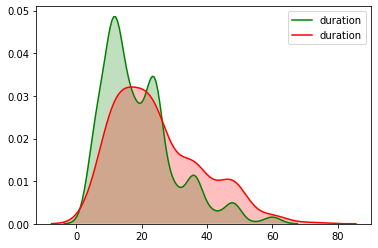

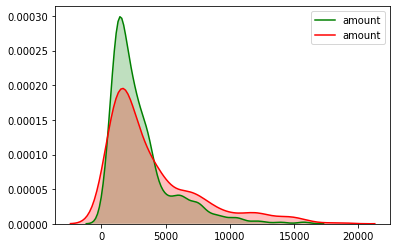

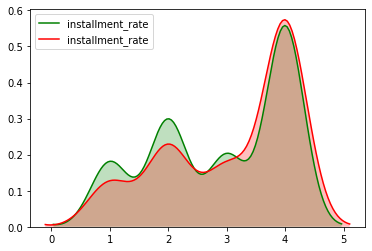

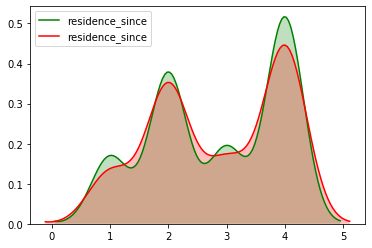

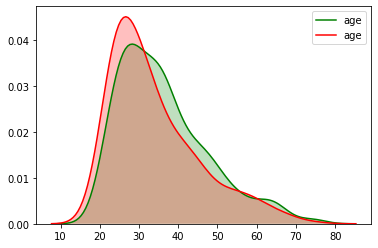

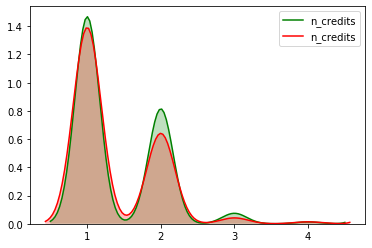

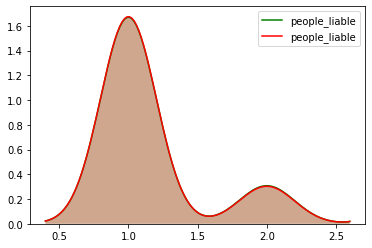

In [6]:
for col in [cname for cname in data.columns[:-1] if data[cname].dtype in ['int64', 'float64']][:-1]:
    good = sns.kdeplot(data.loc[(data.good_bad == 1)][col], shade=True, color="g")
    bad = sns.kdeplot(data.loc[(data.good_bad == 2)][col], shade=True, color="r")
    
    # Show plot
    plt.show()
    
#separately show 'people_liable' column because auto-calculated bandwith is 0 
good = sns.kdeplot(data.loc[(data.good_bad == 1)].people_liable, shade=True, color="g", bw = 0.2)
bad = sns.kdeplot(data.loc[(data.good_bad == 2)].people_liable, shade=True, color="r", bw = 0.2)

# Show plot
plt.show()

We can observe quite obvious results:
* The shorter credit duration, the better.
* The smaller credit amount, the better.
* The smaller installment rate, the better.
* Duration of ownership of current residence didn't show any correlations.
* The older bank client, the better (visible advantage appears after 30 years). 
* Customers with 2 credits in that bank tend to be better (presumably 1 is not enough to ensure loaylty, and 3 might be too much to handle).
* Number of people being liable to provide maintenance for doesn't affect the result value.

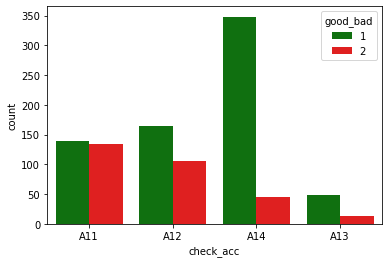

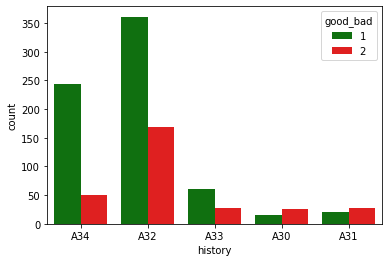

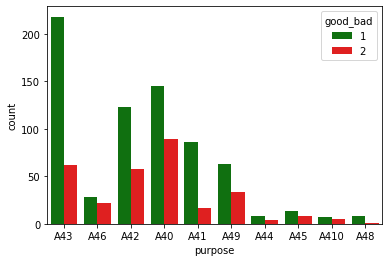

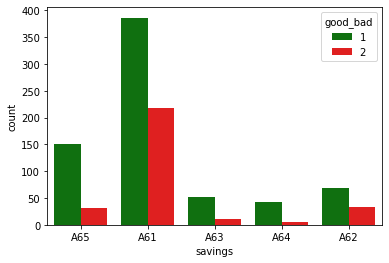

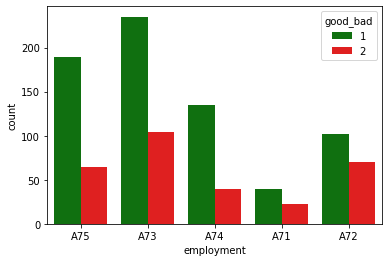

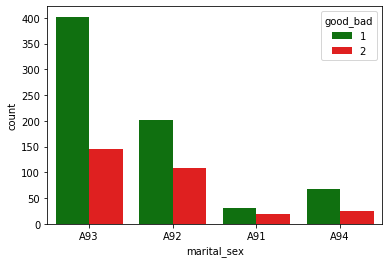

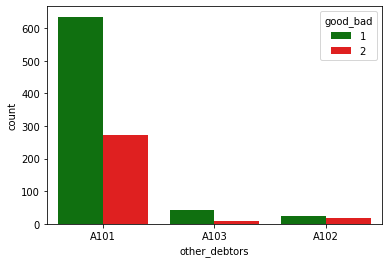

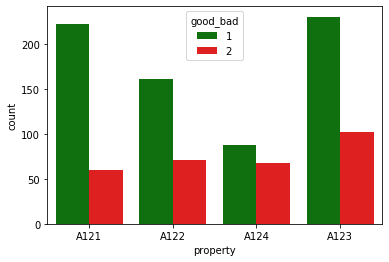

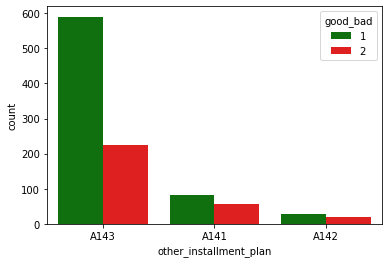

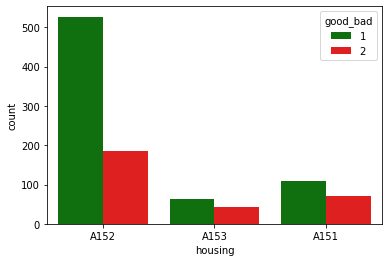

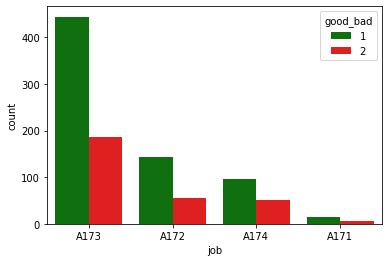

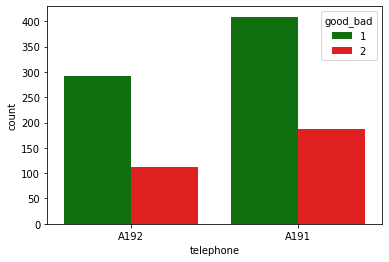

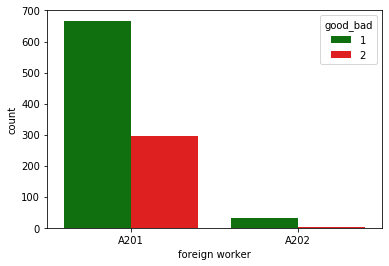

In [64]:
for col in [cname for cname in data.columns[:-1] if data[cname].dtype == 'object']:
    sns.countplot(x=col, hue="good_bad", data=data, palette=['g', 'r'])
    
    # Show plot
    plt.show()

Some of the conclusions derived from the plots don't make sense, so further analysis is needed.
* The more checking account has money on it or there is no checking account, the better.
* For some reason there is bigger percentage of bad credits of those who paid them duly (needs further exploration).
* Purpose shouldn't be considered too seriously alone, because it presumably has correlation with amount (needs further exploration).
* The more savings account has money on it or there is no savings account, the better.
* The more stable client's employment, the better.
* Marital_sex has very confusing group separation, so no definite result can be derived.
* If there is a guarantor, credit is likely to be good. If there is a co-applicant, there is higher chance of credit being bad (maybe client feels less responsible and asks more money from co-applicant, which might refuse to borrow it).
* The more expensive property client has, the better.
* Owning a house, is better than renting it, which is better than having it for free.
* Job skill doesn't affect the result value.
* Telephone doesn't affect the result value.
* If client is a foreign worker, the chances of credit being bad are higher.